### XGBoost
- 트리 기반의 앙상블 기법
- 분류에 있어 좋은 성능
- GBM기반이지만 느린 수행시간과 과적합 문제 해결

In [2]:
from sklearn.datasets import load_breast_cancer, load_iris, load_wine
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.metrics import accuracy_score, precision_score, recall_score

import xgboost as xgb
from xgboost import XGBClassifier, XGBRegressor
from xgboost import plot_importance, plot_tree

import graphviz
import matplotlib.pyplot as plt
plt.style.use(['seaborn-whitegrid'])

In [8]:
cancer = load_breast_cancer()
x_train, x_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=0.2, random_state=123)
dtrain = xgb.DMatrix(data=x_train, label=y_train)
dtest = xgb.DMatrix(data=x_test, label=y_test)

In [9]:
params = {
  'max_depth': 3,
  'eta': 0.1,
  'objective': 'binary:logistic',
  'eval_metric': 'logloss',
}
num_round = 400

In [10]:
evals = [(dtrain, 'train'), (dtest, 'eval')]

xgb_model = xgb.train(
  params=params, 
  dtrain=dtrain, 
  num_boost_round=num_round, 
  early_stopping_rounds=100,
  evals=evals
)

[0]	train-logloss:0.60944	eval-logloss:0.61010
[1]	train-logloss:0.54047	eval-logloss:0.54074
[2]	train-logloss:0.48211	eval-logloss:0.48490
[3]	train-logloss:0.43365	eval-logloss:0.43922
[4]	train-logloss:0.39072	eval-logloss:0.39791
[5]	train-logloss:0.35372	eval-logloss:0.36211
[6]	train-logloss:0.32223	eval-logloss:0.32996
[7]	train-logloss:0.29292	eval-logloss:0.30179
[8]	train-logloss:0.26731	eval-logloss:0.27801
[9]	train-logloss:0.24409	eval-logloss:0.25775
[10]	train-logloss:0.22517	eval-logloss:0.24037
[11]	train-logloss:0.20807	eval-logloss:0.22271
[12]	train-logloss:0.19177	eval-logloss:0.20795
[13]	train-logloss:0.17746	eval-logloss:0.19531
[14]	train-logloss:0.16408	eval-logloss:0.18460
[15]	train-logloss:0.15250	eval-logloss:0.17183
[16]	train-logloss:0.14198	eval-logloss:0.16152
[17]	train-logloss:0.13270	eval-logloss:0.15443
[18]	train-logloss:0.12326	eval-logloss:0.14913
[19]	train-logloss:0.11591	eval-logloss:0.14175
[20]	train-logloss:0.10884	eval-logloss:0.13378
[2

In [11]:
pred = xgb_model.predict(dtest)
print(pred[:10])

[9.9955374e-01 9.9917752e-01 8.6196855e-04 9.9485481e-01 5.4615230e-04
 9.8911756e-01 9.9485010e-01 9.9818277e-01 9.6617907e-01 7.9452908e-01]


In [12]:
pred = [1 if x > 0.5 else 0 for x in pred]
print(f'acc : {accuracy_score(y_test, pred)}')
print(f'precision : {precision_score(y_test, pred)}')
print(f'recall : {recall_score(y_test, pred)}')

acc : 0.9736842105263158
precision : 0.972972972972973
recall : 0.9863013698630136


<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

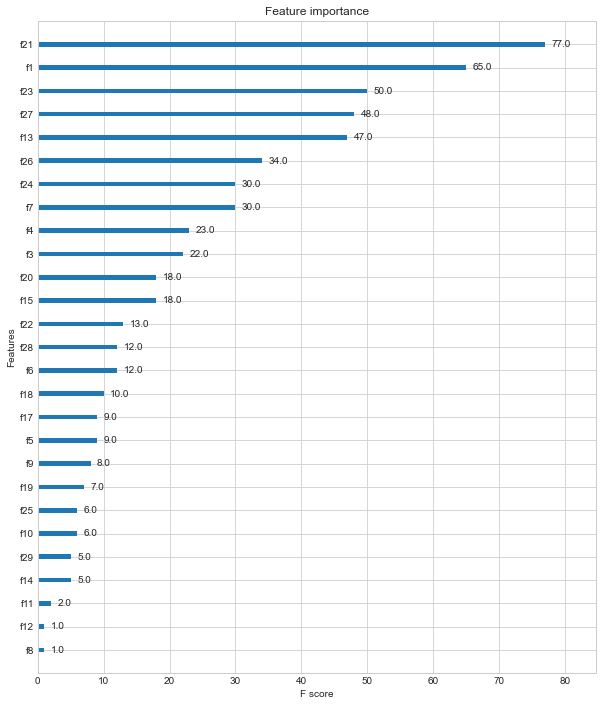

In [13]:
fig, ax = plt.subplots(figsize=(10, 12))
plot_importance(xgb_model, ax=ax)

### XGBClassifier

In [14]:
iris = load_iris()
x_train, x_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=0.2, random_state=123)

In [15]:
xgbc = XGBClassifier(
  n_estimators=400,
  learning_rate=0.1,
  max_depth=3
)
xgbc.fit(x_train, y_train)
pred = xgbc.predict(x_test)
pred_proba = xgbc.predict_proba(x_test)[:, 1]

In [16]:
cross_val = cross_validate(
  estimator=xgbc,
  X=iris.data, y=iris.target,
  cv=5
)

print(f"avg fit time : {cross_val['fit_time'].mean()}")
print(f"avg score time : {cross_val['score_time'].mean()}")
print(f"avg test score : {cross_val['test_score'].mean()}")


[10:52:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "scale_pos_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[10:52:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "scale_pos_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[10:52:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "scale_pos_weight" } might not be 